In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 96% 157M/163M [00:02<00:00, 104MB/s] 
100% 163M/163M [00:02<00:00, 64.5MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2465.jpg', 'with_mask_3691.jpg', 'with_mask_3392.jpg', 'with_mask_2862.jpg', 'with_mask_206.jpg']
['with_mask_1806.jpg', 'with_mask_1337.jpg', 'with_mask_1847.jpg', 'with_mask_362.jpg', 'with_mask_2594.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1893.jpg', 'without_mask_2141.jpg', 'without_mask_2460.jpg', 'without_mask_1853.jpg', 'without_mask_319.jpg']
['without_mask_63.jpg', 'without_mask_3603.jpg', 'without_mask_1063.jpg', 'without_mask_2697.jpg', 'without_mask_3712.jpg']


In [ ]:
print(f'Number of with mask images: {len(with_mask_files)}')
print(f'Number of without mask images: {len(without_mask_files)}')

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the image classes

with mask -> 1
Without mask -> 0

In [ ]:
with_mask_labels = [1] * 3725
without_mask_labels = [0] * 3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

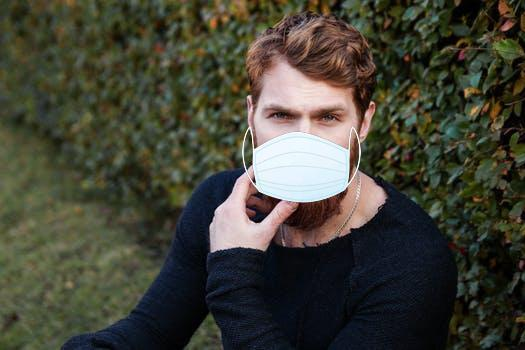

In [ ]:
img = cv2.imread('/content/data/with_mask/with_mask_1.jpg')
img_display = cv2_imshow(img)

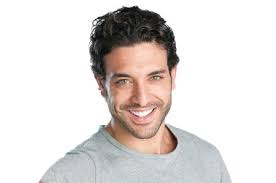

In [ ]:
img2 = cv2.imread('/content/data/without_mask/without_mask_1000.jpg')
img2_display = cv2_imshow(img2)

Image Preprocessing


*   Resizing
*   Convert into Numpy Arrays



In [ ]:
# convert images into numpy arrays
from PIL import Image
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[204, 204, 216],
        [204, 204, 216],
        [202, 202, 214],
        ...,
        [211, 211, 219],
        [211, 211, 220],
        [208, 208, 220]],

       [[206, 206, 218],
        [206, 206, 218],
        [204, 204, 216],
        ...,
        [205, 205, 214],
        [208, 208, 217],
        [207, 207, 218]],

       [[210, 210, 222],
        [209, 209, 221],
        [208, 208, 220],
        ...,
        [197, 198, 205],
        [200, 201, 209],
        [203, 203, 212]],

       ...,

       [[147, 154,  97],
        [147, 156,  98],
        [145, 158, 100],
        ...,
        [ 24,  26,  33],
        [ 34,  34,  41],
        [ 35,  36,  38]],

       [[141, 149,  93],
        [143, 152,  95],
        [146, 156,  99],
        ...,
        [ 26,  27,  31],
        [ 38,  37,  42],
        [ 38,  40,  40]],

       [[133, 143,  88],
        [140, 147,  93],
        [148, 154, 100],
        ...,
        [ 32,  31,  30],
        [ 37,  36,  35],
        [ 39,  39,  37]]], dtype=uint8)
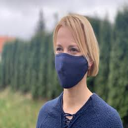

In [ ]:
data[0]

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays
X = np.array(data)
y = np.array(labels)

In [ ]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(X)

[[[[204 204 216]
   [204 204 216]
   [202 202 214]
   ...
   [211 211 219]
   [211 211 220]
   [208 208 220]]

  [[206 206 218]
   [206 206 218]
   [204 204 216]
   ...
   [205 205 214]
   [208 208 217]
   [207 207 218]]

  [[210 210 222]
   [209 209 221]
   [208 208 220]
   ...
   [197 198 205]
   [200 201 209]
   [203 203 212]]

  ...

  [[147 154  97]
   [147 156  98]
   [145 158 100]
   ...
   [ 24  26  33]
   [ 34  34  41]
   [ 35  36  38]]

  [[141 149  93]
   [143 152  95]
   [146 156  99]
   ...
   [ 26  27  31]
   [ 38  37  42]
   [ 38  40  40]]

  [[133 143  88]
   [140 147  93]
   [148 154 100]
   ...
   [ 32  31  30]
   [ 37  36  35]
   [ 39  39  37]]]


 [[[168 145 101]
   [167 144  99]
   [167 144  97]
   ...
   [178 150 102]
   [177 149 101]
   [177 149 101]]

  [[168 145 101]
   [167 145 100]
   [167 144  98]
   ...
   [178 150 102]
   [177 149 101]
   [177 149 101]]

  [[169 146 102]
   [168 145 100]
   [168 145  98]
   ...
   [178 150 102]
   [177 149 101]
   [177 149

In [ ]:
print(y)

[1 1 1 ... 0 0 0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [ ]:
# scaling the data
X_train = X_train/255
X_test = X_test /255

Building the CNN

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow  import keras

In [ ]:
number_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(number_of_classes, activation = 'sigmoid'))

In [ ]:
# compiling the nural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
170/170 [==============================] - 127s 733ms/step - loss: 0.4730 - accuracy: 0.8015 - val_loss: 0.3896 - val_accuracy: 0.8331
Epoch 2/10
170/170 [==============================] - 167s 986ms/step - loss: 0.3058 - accuracy: 0.8716 - val_loss: 0.2816 - val_accuracy: 0.8826
Epoch 3/10
170/170 [==============================] - 164s 959ms/step - loss: 0.2748 - accuracy: 0.8895 - val_loss: 0.2702 - val_accuracy: 0.9008
Epoch 4/10
170/170 [==============================] - 157s 926ms/step - loss: 0.2336 - accuracy: 0.9040 - val_loss: 0.2450 - val_accuracy: 0.9124
Epoch 5/10
170/170 [==============================] - 122s 716ms/step - loss: 0.2016 - accuracy: 0.9209 - val_loss: 0.2354 - val_accuracy: 0.8942
Epoch 6/10
170/170 [==============================] - 121s 712ms/step - loss: 0.1775 - accuracy: 0.9268 - val_loss: 0.2459 - val_accuracy: 0.9124
Epoch 7/10
170/170 [==============================] - 123s 720ms/step - loss: 0.1519 - accuracy: 0.9388 - val_loss: 0.2532 -

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

48/48 [==============================] - 15s 323ms/step - loss: 0.2298 - accuracy: 0.9246
0.22979994118213654
0.9245532751083374


Text(0, 0.5, 'Accuracy')

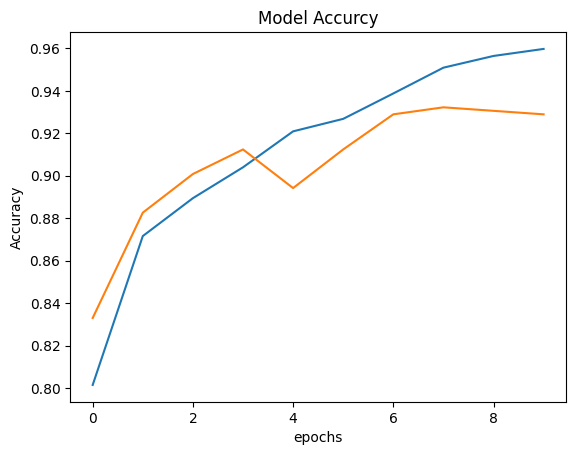

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accurcy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'loss')

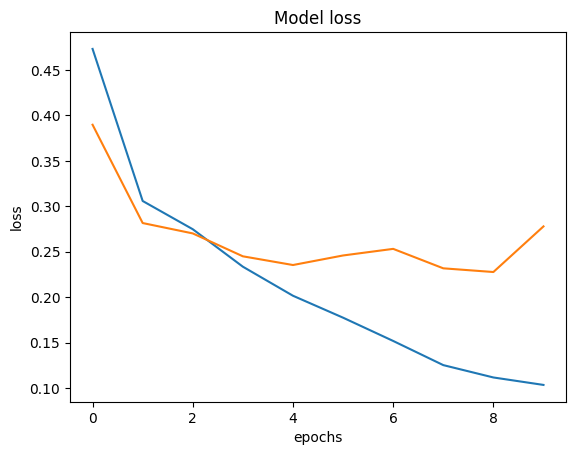

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epochs')
plt.ylabel('loss')

predictive system

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')